In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sbn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from math import ceil

import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
import scipy.stats as scs
import statsmodels.api as sm




from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


import timeit
import datetime as dt

In [2]:
data = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jan_Jun.csv')
data_2 = pd.read_csv('~/Downloads/EIA930_BALANCE_2020_Jul_Dec.csv')

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,15,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/cp/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (11,14,16,17,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279668 entries, 0 to 279667
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Balancing Authority                                     279668 non-null  object 
 1   Data Date                                               279668 non-null  object 
 2   Hour Number                                             279668 non-null  int64  
 3   Local Time at End of Hour                               279668 non-null  object 
 4   UTC Time at End of Hour                                 279668 non-null  object 
 5   Demand Forecast (MW)                                    230824 non-null  float64
 6   Demand (MW)                                             234830 non-null  float64
 7   Net Generation (MW)                                     278250 non-null  float64
 8   Total Interchange (MW)  

In [ ]:
data.describe()

In [ ]:
# data['Demand (MW)'] = data['Demand (MW)'].str.replace(',', '')
# data['Demand (MW)'] = data['Demand (MW)'].astype(float)

In [ ]:
data.info()

In [ ]:
data['Demand (MW)'][0]

In [ ]:
# data['Net Generation (MW)'] = data['Net Generation (MW)'].str.replace(',', '')
# data['Net Generation (MW)'] = data['Net Generation (MW)'].astype(float)

In [ ]:
# data['Demand Forecast (MW)'] = data['Demand Forecast (MW)'].str.replace(',', '')
# data['Demand Forecast (MW)'] = data['Demand Forecast (MW)'].astype(float)

In [ ]:
# data['Total Interchange (MW)'] = data['Total Interchange (MW)'].str.replace(',', '')
# data['Total Interchange (MW)'] = data['Total Interchange (MW)'].astype(float)

In [ ]:
# data['Net Generation (MW) (Adjusted)'] = data['Net Generation (MW) (Adjusted)'].str.replace(',', '')
# data['Net Generation (MW) (Adjusted)'] = data['Net Generation (MW) (Adjusted)'].astype(float)

In [ ]:
# data['Net Generation (MW) from Coal'] = data['Net Generation (MW) from Coal'].str.replace(',', '')
# data['Net Generation (MW) from Coal'] = data['Net Generation (MW) from Coal'].astype(float)

In [ ]:
# data['Net Generation (MW) from Coal'] = data['Net Generation (MW) from Coal'].str.replace(',', '')
# data['Net Generation (MW) from Coal'] = data['Net Generation (MW) from Coal'].astype(float)

In [3]:
def change_cols_to_floats(dataframe,lst):
    
    for i in lst:
        dataframe[i] = dataframe[i].str.replace(',', '')
        dataframe[i] = dataframe[i].astype(float)
    return dataframe
        
        
        

In [4]:
lst_cols = ['Demand (MW)','Net Generation (MW) from Natural Gas', 'Net Generation (MW) from Nuclear','Net Generation (MW) from All Petroleum Products','Net Generation (MW) from Hydropower and Pumped Storage', 'Net Generation (MW) from Solar', 'Net Generation (MW) from Wind', 'Net Generation (MW) from Other Fuel Sources','Net Generation (MW)','Demand Forecast (MW)', 'Total Interchange (MW)', 'Net Generation (MW) (Adjusted)','Net Generation (MW) from Coal','Sum(Valid DIBAs) (MW)','Demand (MW) (Imputed)', 'Net Generation (MW) (Imputed)','Demand (MW) (Adjusted)']
# change_cols_to_floats(data,lst)
data_convert = change_cols_to_floats(data, lst_cols)
data_2_convert = change_cols_to_floats(data_2, lst_cols)

In [7]:
data_convert.info()
data_2_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279668 entries, 0 to 279667
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Balancing Authority                                     279668 non-null  object 
 1   Data Date                                               279668 non-null  object 
 2   Hour Number                                             279668 non-null  int64  
 3   Local Time at End of Hour                               279668 non-null  object 
 4   UTC Time at End of Hour                                 279668 non-null  object 
 5   Demand Forecast (MW)                                    230824 non-null  float64
 6   Demand (MW)                                             234830 non-null  float64
 7   Net Generation (MW)                                     278250 non-null  float64
 8   Total Interchange (MW)  

In [ ]:
data['Data Date'] = pd.to_datetime(data['Data Date'])

# data['Hour Number'] = pd.to_datetime(data['Hour Number'])


data['Local Time at End of Hour'] = pd.to_datetime(data['Local Time at End of Hour'])
# data['UTC Time at End of Hour'] = pd.to_datetime(data['UTC Time at End of Hour'])

In [8]:
lst_data = [data_convert,data_2_convert]
df_total = pd.concat(lst_data)

In [9]:

df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562344 entries, 0 to 282675
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   Balancing Authority                                     562344 non-null  object 
 1   Data Date                                               562344 non-null  object 
 2   Hour Number                                             562344 non-null  int64  
 3   Local Time at End of Hour                               562344 non-null  object 
 4   UTC Time at End of Hour                                 562344 non-null  object 
 5   Demand Forecast (MW)                                    463182 non-null  float64
 6   Demand (MW)                                             471116 non-null  float64
 7   Net Generation (MW)                                     558363 non-null  float64
 8   Total Interchange (MW)  

In [ ]:
df_total.head()

In [43]:
df_total.loc[0,'Net Generation (MW) from Coal':'Net Generation (MW) from Unknown Fuel Sources']

,Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
0,-5.0,722.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
0,139.0,536.0,NaN,NaN,1.0,NaN,NaN,5.0,NaN


In [11]:
df_total.DatetimeIndex.fillna(value=None, downcast=None)

AttributeError: 'DataFrame' object has no attribute 'DatetimeIndex'

In [ ]:
df_total.shape

In [ ]:
# df_total.to_csv('~/Desktop/capstone2/CP_energy_data_Clean.csv')

array([[<AxesSubplot:title={'center':'Hour Number'}>,
        <AxesSubplot:title={'center':'Demand Forecast (MW)'}>,
        <AxesSubplot:title={'center':'Demand (MW)'}>,
        <AxesSubplot:title={'center':'Net Generation (MW)'}>],
       [<AxesSubplot:title={'center':'Total Interchange (MW)'}>,
        <AxesSubplot:title={'center':'Sum(Valid DIBAs) (MW)'}>,
        <AxesSubplot:title={'center':'Demand (MW) (Imputed)'}>,
        <AxesSubplot:title={'center':'Net Generation (MW) (Imputed)'}>],
       [<AxesSubplot:title={'center':'Demand (MW) (Adjusted)'}>,
        <AxesSubplot:title={'center':'Net Generation (MW) (Adjusted)'}>,
        <AxesSubplot:title={'center':'Net Generation (MW) from Coal'}>,
        <AxesSubplot:title={'center':'Net Generation (MW) from Natural Gas'}>],
       [<AxesSubplot:title={'center':'Net Generation (MW) from Nuclear'}>,
        <AxesSubplot:title={'center':'Net Generation (MW) from All Petroleum Products'}>,
        <AxesSubplot:title={'center':'Net Gen

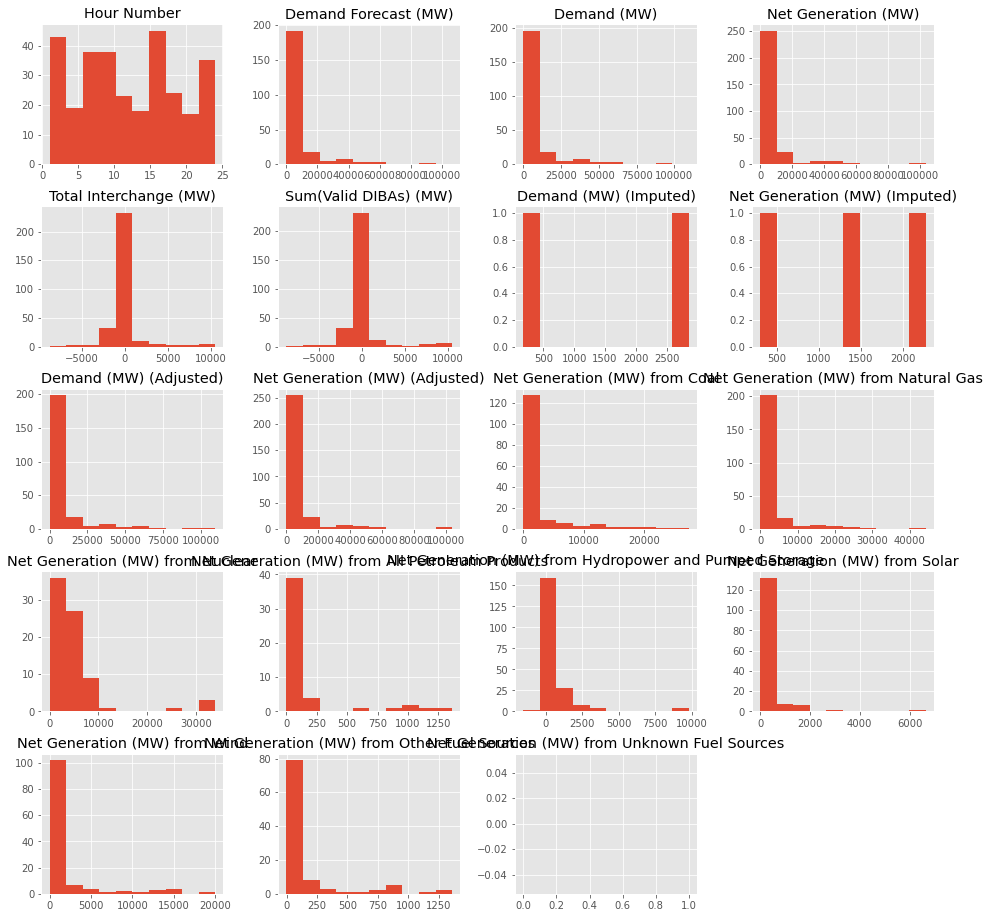

In [60]:
df_total.sample(n=300).hist(figsize = (16,16))

In [ ]:
df_total.info()

In [ ]:
len(df_total['Balancing Authority'].value_counts())

In [ ]:
df_total['Balancing Authority'].value_counts()

In [ ]:
df_total['Balancing Authority'].unique()

In [ ]:
df_total.info()

In [ ]:
df_total.describe(include = 'all')

In [ ]:
df_total.head()

In [12]:
small_sample = df_total.sample(n=400)


In [13]:
small_sample.describe(include= 'all')

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) (Adjusted),Net Generation (MW) from Coal,Net Generation (MW) from Natural Gas,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources
count,400,400,400.000000,400,400,339.000000,339.000000,396.000000,396.000000,396.000000,...,399.000000,217.000000,318.000000,115.000000,55.000000,285.000000,213.000000,159.000000,132.000000,0.0
unique,65,238,NaN,390,389,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TPWR,02/14/2020,NaN,10/16/2020 10:00:00 PM,02/22/2020 9:00:00 PM,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,11,6,NaN,3,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12.072500,NaN,NaN,9014.085546,9083.395280,7676.419192,5.073232,69.287879,...,7500.867168,2767.299539,3898.591195,5538.426087,270.163636,783.336842,337.615023,1209.842767,347.772727,NaN
std,NaN,NaN,6.851979,NaN,NaN,19551.702000,19410.249003,18507.414651,2152.180177,2352.158815,...,18366.486300,5812.026834,8883.276426,7963.036045,609.776546,1721.918329,1185.071975,2646.080398,590.147305,NaN
min,NaN,NaN,1.000000,NaN,NaN,37.000000,-160.000000,-2.000000,-8941.000000,-8982.000000,...,-2.000000,-18.000000,-241.000000,-27.000000,-1.000000,-319.000000,-42.000000,-1.000000,-4.000000,NaN
25%,NaN,NaN,6.000000,NaN,NaN,732.500000,667.500000,487.500000,-497.500000,-497.500000,...,476.500000,217.000000,223.250000,1159.500000,0.000000,36.000000,0.000000,8.000000,15.000000,NaN
50%,NaN,NaN,12.000000,NaN,NaN,2240.000000,2335.000000,1340.500000,-21.500000,-16.500000,...,1336.000000,645.000000,712.500000,3346.000000,0.000000,238.000000,0.000000,199.000000,76.000000,NaN
75%,NaN,NaN,18.000000,NaN,NaN,5907.500000,6255.500000,5171.500000,353.000000,384.500000,...,5043.500000,2459.000000,2876.250000,5784.500000,213.500000,786.000000,127.000000,964.500000,358.500000,NaN


In [ ]:
small_sample.info()

In [52]:
del small_sample['Test Column4'] 

def make_date_time_col(df):
    df['Data Date']= df['Data Date'].astype(str)
    df['Data Date']= df['Data Date'].replace(['/', '-'])
    df['Hour Number'] = df['Hour Number'].astype(str)
    
    df['Test Column4'] = df['Data Date'].map(str) + " " + df['Hour Number']
    return df
    
#     df['Test Column'] = df.agg('{0[bar]} is {0[foo]}'.format, axis=1)
    
    
    
    




In [34]:
small_sample['Test Column2'] = pd.to_datetime(small_sample['Test Column4'], format ='%m/%d/%Y/%H' )

ValueError: unconverted data remains: 4

In [ ]:
def convert_date_time_col(df, col_name):
    df['Test column3'] = df[col_name]
    

In [53]:
# small_sample['Data Date'] = pd.to_datetime(small_sample['Data Date'], format)
# small_sample['Test Column'] = 

make_date_time_col(small_sample)
small_sample.iloc[:4, -6:]

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13
232851,TAL,02/20/2020,24,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 24
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8,07/10/2020 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198503,SCEG,03/16/2020,14,03/16/2020 2:00:00 PM,03/16/2020 6:00:00 PM,2405.0,2361.0,2529.0,168.0,168.0,...,NaN,133.0,276.0,NaN,NaN,NaN,03/16/2020 sliced 14,03/16/2020-14,03/16/2020-14,03/16/2020 14
174532,PGE,06/17/2020,14,06/17/2020 2:00:00 PM,06/17/2020 9:00:00 PM,2387.0,2316.0,211.0,-2105.0,-2105.0,...,NaN,213.0,NaN,0.0,3.0,NaN,06/17/2020 sliced 14,06/17/2020-14,06/17/2020-14,06/17/2020 14
247489,TIDC,07/07/2020,4,07/07/2020 4:00:00 AM,07/07/2020 11:00:00 AM,297.0,290.0,240.0,-49.0,-49.0,...,NaN,43.0,NaN,NaN,NaN,NaN,07/07/2020 sliced 4,07/07/2020-4,07/07/2020-4,07/07/2020 4
45942,CPLW,09/12/2020,22,09/12/2020 10:00:00 PM,09/13/2020 2:00:00 AM,551.0,563.0,560.0,-3.0,-3.0,...,NaN,76.0,0.0,NaN,177.0,NaN,09/12/2020 sliced 22,09/12/2020-22,09/12/2020-22,09/12/2020 22


In [ ]:
small_sample['Data Date'].head()
small_sample.head(25)
small_sample.columns

In [ ]:
# small_sample.iloc[188065]

In [ ]:
small_sample.info()

In [54]:
small_sample.iloc[:4, -6:]
# df_total.loc[0,'Net Generation (MW) from Coal':'Net Generation (MW) from Unknown Fuel Sources']

,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1
214108,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13
232851,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 24
84307,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12


In [68]:
# small_sample['Test Column4'] = pd.to_datetime(small_sample['Test Column4'],infer_datetime_format=True, format ='%m/%d/%Y %H' )
lst_cols = ['Data Date', 'Hour Number', 'Test Column','Test Column2', 'Test Column4']

df_dates = small_sample.loc[:, lst_cols]
df_dates

,Data Date,Hour Number,Test Column,Test Column2,Test Column4
254880,11/08/2020,1,11/08/2020 sliced 1,11/08/2020-1,11/08/2020 1
214108,09/26/2020,13,09/26/2020 sliced 13,09/26/2020-13,09/26/2020 13
232851,02/20/2020,24,02/20/2020 sliced 24,02/20/2020-24,02/20/2020 24
84307,06/27/2020,12,06/27/2020 sliced 12,06/27/2020-12,06/27/2020 12
163645,07/10/2020,8,07/10/2020 sliced 8,07/10/2020-8,07/10/2020 8
...,...,...,...,...,...
198503,03/16/2020,14,03/16/2020 sliced 14,03/16/2020-14,03/16/2020 14
174532,06/17/2020,14,06/17/2020 sliced 14,06/17/2020-14,06/17/2020 14
247489,07/07/2020,4,07/07/2020 sliced 4,07/07/2020-4,07/07/2020 4
45942,09/12/2020,22,09/12/2020 sliced 22,09/12/2020-22,09/12/2020 22


In [73]:
# small_sample["Test Column4"] = small_sample["Int'l Plan"].replace('yes', 1)
def date_time_func(df, col_name):
    
    for i in df[col_name]:
        
        i = f'{i}:00:00'
        print(i)
    return df

# for i
# df["Int'l Plan"] = df["Int'l Plan"].replace('no', 0)
# df["VMail Plan"] = df["VMail Plan"].replace('yes', 1)
# df["VMail Plan"] = df["VMail Plan"].replace('no', 0)

In [74]:
date_time_func(small_sample, 'Test Column4')

11/08/2020 1:00:00
09/26/2020 13:00:00
02/20/2020 24:00:00
06/27/2020 12:00:00
07/10/2020 8:00:00
06/20/2020 2:00:00
08/29/2020 20:00:00
04/22/2020 16:00:00
07/29/2020 4:00:00
03/28/2020 1:00:00
06/21/2020 12:00:00
01/25/2020 17:00:00
04/06/2020 10:00:00
10/09/2020 1:00:00
12/06/2020 4:00:00
11/09/2020 5:00:00
05/31/2020 4:00:00
07/26/2020 12:00:00
02/12/2020 3:00:00
09/30/2020 18:00:00
04/08/2020 21:00:00
05/10/2020 8:00:00
10/16/2020 22:00:00
03/10/2020 23:00:00
11/06/2020 22:00:00
09/10/2020 9:00:00
01/17/2020 13:00:00
10/25/2020 9:00:00
02/22/2020 14:00:00
07/14/2020 6:00:00
12/17/2020 23:00:00
11/19/2020 21:00:00
03/12/2020 13:00:00
06/09/2020 12:00:00
08/07/2020 19:00:00
05/23/2020 4:00:00
12/24/2020 15:00:00
06/28/2020 19:00:00
01/03/2020 23:00:00
07/25/2020 17:00:00
06/09/2020 5:00:00
04/10/2020 14:00:00
08/22/2020 19:00:00
12/10/2020 6:00:00
04/08/2020 10:00:00
03/11/2020 2:00:00
03/14/2020 17:00:00
03/29/2020 9:00:00
01/15/2020 18:00:00
09/19/2020 7:00:00
03/24/2020 24:00:00


,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13
232851,TAL,02/20/2020,24,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 24
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8,07/10/2020 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198503,SCEG,03/16/2020,14,03/16/2020 2:00:00 PM,03/16/2020 6:00:00 PM,2405.0,2361.0,2529.0,168.0,168.0,...,NaN,133.0,276.0,NaN,NaN,NaN,03/16/2020 sliced 14,03/16/2020-14,03/16/2020-14,03/16/2020 14
174532,PGE,06/17/2020,14,06/17/2020 2:00:00 PM,06/17/2020 9:00:00 PM,2387.0,2316.0,211.0,-2105.0,-2105.0,...,NaN,213.0,NaN,0.0,3.0,NaN,06/17/2020 sliced 14,06/17/2020-14,06/17/2020-14,06/17/2020 14
247489,TIDC,07/07/2020,4,07/07/2020 4:00:00 AM,07/07/2020 11:00:00 AM,297.0,290.0,240.0,-49.0,-49.0,...,NaN,43.0,NaN,NaN,NaN,NaN,07/07/2020 sliced 4,07/07/2020-4,07/07/2020-4,07/07/2020 4
45942,CPLW,09/12/2020,22,09/12/2020 10:00:00 PM,09/13/2020 2:00:00 AM,551.0,563.0,560.0,-3.0,-3.0,...,NaN,76.0,0.0,NaN,177.0,NaN,09/12/2020 sliced 22,09/12/2020-22,09/12/2020-22,09/12/2020 22


In [82]:
small_sample
small_sample['Test Column4']

254880     11/08/2020 1
214108    09/26/2020 13
232851    02/20/2020 24
84307     06/27/2020 12
163645     07/10/2020 8
              ...      
198503    03/16/2020 14
174532    06/17/2020 14
247489     07/07/2020 4
45942     09/12/2020 22
40486      02/19/2020 7
Name: Test Column4, Length: 400, dtype: object

In [76]:
small_sample['Test Column4'] = pd.to_datetime(small_sample['Test Column4'])
# data['Data Date'] = pd.to_datetime(data['Data Date'])

ParserError: Unknown string format: 11/08/2020 1

In [80]:
small_sample.info()
small_sample['Test Column4']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 254880 to 40486
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Balancing Authority                                     400 non-null    object 
 1   Data Date                                               400 non-null    object 
 2   Hour Number                                             400 non-null    object 
 3   Local Time at End of Hour                               400 non-null    object 
 4   UTC Time at End of Hour                                 400 non-null    object 
 5   Demand Forecast (MW)                                    339 non-null    float64
 6   Demand (MW)                                             339 non-null    float64
 7   Net Generation (MW)                                     396 non-null    float64
 8   Total Interchange (MW)           

254880     11/08/2020 1
214108    09/26/2020 13
232851    02/20/2020 24
84307     06/27/2020 12
163645     07/10/2020 8
              ...      
198503    03/16/2020 14
174532    06/17/2020 14
247489     07/07/2020 4
45942     09/12/2020 22
40486      02/19/2020 7
Name: Test Column4, Length: 400, dtype: object

In [88]:
small_sample['Test Column4']= small_sample['Test Column4'].apply(lambda x:f'{x}:00:00' )


In [89]:
small_sample.head()

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1:00:00
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13:00:00
232851,TAL,02/20/2020,24,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 24:00:00
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12:00:00
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8,07/10/2020 8:00:00


In [91]:
small_sample['Test Column4'] = pd.to_datetime(small_sample['Test Column4'])


ParserError: hour must be in 0..23: 02/20/2020 24:00:00

In [94]:
small_sample['Hour Number'] = small_sample['Hour Number'].replace('24', '0')

# small_sample['Hour Number']= small_sample['Hour Number'].apply(lambda x:f'{x}:00:00' )


# df["Int'l Plan"] = df["Int'l Plan"].replace('no', 0)

In [95]:
small_sample

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1:00:00
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13:00:00
232851,TAL,02/20/2020,0,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 24:00:00
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12:00:00
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8,07/10/2020 8:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198503,SCEG,03/16/2020,14,03/16/2020 2:00:00 PM,03/16/2020 6:00:00 PM,2405.0,2361.0,2529.0,168.0,168.0,...,NaN,133.0,276.0,NaN,NaN,NaN,03/16/2020 sliced 14,03/16/2020-14,03/16/2020-14,03/16/2020 14:00:00
174532,PGE,06/17/2020,14,06/17/2020 2:00:00 PM,06/17/2020 9:00:00 PM,2387.0,2316.0,211.0,-2105.0,-2105.0,...,NaN,213.0,NaN,0.0,3.0,NaN,06/17/2020 sliced 14,06/17/2020-14,06/17/2020-14,06/17/2020 14:00:00
247489,TIDC,07/07/2020,4,07/07/2020 4:00:00 AM,07/07/2020 11:00:00 AM,297.0,290.0,240.0,-49.0,-49.0,...,NaN,43.0,NaN,NaN,NaN,NaN,07/07/2020 sliced 4,07/07/2020-4,07/07/2020-4,07/07/2020 4:00:00
45942,CPLW,09/12/2020,22,09/12/2020 10:00:00 PM,09/13/2020 2:00:00 AM,551.0,563.0,560.0,-3.0,-3.0,...,NaN,76.0,0.0,NaN,177.0,NaN,09/12/2020 sliced 22,09/12/2020-22,09/12/2020-22,09/12/2020 22:00:00


In [99]:
small_sample['Hour Number'].unique()

array(['1', '13', '0', '12', '8', '2', '20', '16', '4', '17', '10', '5',
       '3', '18', '21', '22', '23', '9', '14', '6', '19', '15', '7', '11'],
      dtype=object)

In [102]:

small_sample

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from Nuclear,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13
232851,TAL,02/20/2020,0,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,3665.0,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198503,SCEG,03/16/2020,14,03/16/2020 2:00:00 PM,03/16/2020 6:00:00 PM,2405.0,2361.0,2529.0,168.0,168.0,...,993.0,NaN,133.0,276.0,NaN,NaN,NaN,03/16/2020 sliced 14,03/16/2020-14,03/16/2020-14
174532,PGE,06/17/2020,14,06/17/2020 2:00:00 PM,06/17/2020 9:00:00 PM,2387.0,2316.0,211.0,-2105.0,-2105.0,...,NaN,NaN,213.0,NaN,0.0,3.0,NaN,06/17/2020 sliced 14,06/17/2020-14,06/17/2020-14
247489,TIDC,07/07/2020,4,07/07/2020 4:00:00 AM,07/07/2020 11:00:00 AM,297.0,290.0,240.0,-49.0,-49.0,...,NaN,NaN,43.0,NaN,NaN,NaN,NaN,07/07/2020 sliced 4,07/07/2020-4,07/07/2020-4
45942,CPLW,09/12/2020,22,09/12/2020 10:00:00 PM,09/13/2020 2:00:00 AM,551.0,563.0,560.0,-3.0,-3.0,...,NaN,NaN,76.0,0.0,NaN,177.0,NaN,09/12/2020 sliced 22,09/12/2020-22,09/12/2020-22


In [103]:
make_date_time_col(small_sample)

,Balancing Authority,Data Date,Hour Number,Local Time at End of Hour,UTC Time at End of Hour,Demand Forecast (MW),Demand (MW),Net Generation (MW),Total Interchange (MW),Sum(Valid DIBAs) (MW),...,Net Generation (MW) from All Petroleum Products,Net Generation (MW) from Hydropower and Pumped Storage,Net Generation (MW) from Solar,Net Generation (MW) from Wind,Net Generation (MW) from Other Fuel Sources,Net Generation (MW) from Unknown Fuel Sources,Test Column,Test Column2,Test Column3,Test Column4
254880,TPWR,11/08/2020,1,11/08/2020 1:00:00 AM,11/08/2020 9:00:00 AM,531.0,564.0,181.0,-383.0,-383.0,...,NaN,181.0,NaN,NaN,NaN,NaN,11/08/2020 sliced 1,11/08/2020-1,11/08/2020-1,11/08/2020 1
214108,SEPA,09/26/2020,13,09/26/2020 1:00:00 PM,09/26/2020 6:00:00 PM,NaN,NaN,111.0,117.0,117.0,...,NaN,111.0,NaN,NaN,NaN,NaN,09/26/2020 sliced 13,09/26/2020-13,09/26/2020-13,09/26/2020 13
232851,TAL,02/20/2020,0,02/21/2020 12:00:00 AM,02/21/2020 5:00:00 AM,234.0,272.0,293.0,20.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,02/20/2020 sliced 24,02/20/2020-24,02/20/2020-24,02/20/2020 0
84307,FPL,06/27/2020,12,06/27/2020 12:00:00 PM,06/27/2020 4:00:00 PM,21475.0,21143.0,21302.0,159.0,159.0,...,0.0,NaN,1432.0,NaN,2139.0,NaN,06/27/2020 sliced 12,06/27/2020-12,06/27/2020-12,06/27/2020 12
163645,PACE,07/10/2020,8,07/10/2020 8:00:00 AM,07/10/2020 2:00:00 PM,5639.0,5558.0,4484.0,-1074.0,-1074.0,...,NaN,252.0,538.0,565.0,119.0,NaN,07/10/2020 sliced 8,07/10/2020-8,07/10/2020-8,07/10/2020 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198503,SCEG,03/16/2020,14,03/16/2020 2:00:00 PM,03/16/2020 6:00:00 PM,2405.0,2361.0,2529.0,168.0,168.0,...,NaN,133.0,276.0,NaN,NaN,NaN,03/16/2020 sliced 14,03/16/2020-14,03/16/2020-14,03/16/2020 14
174532,PGE,06/17/2020,14,06/17/2020 2:00:00 PM,06/17/2020 9:00:00 PM,2387.0,2316.0,211.0,-2105.0,-2105.0,...,NaN,213.0,NaN,0.0,3.0,NaN,06/17/2020 sliced 14,06/17/2020-14,06/17/2020-14,06/17/2020 14
247489,TIDC,07/07/2020,4,07/07/2020 4:00:00 AM,07/07/2020 11:00:00 AM,297.0,290.0,240.0,-49.0,-49.0,...,NaN,43.0,NaN,NaN,NaN,NaN,07/07/2020 sliced 4,07/07/2020-4,07/07/2020-4,07/07/2020 4
45942,CPLW,09/12/2020,22,09/12/2020 10:00:00 PM,09/13/2020 2:00:00 AM,551.0,563.0,560.0,-3.0,-3.0,...,NaN,76.0,0.0,NaN,177.0,NaN,09/12/2020 sliced 22,09/12/2020-22,09/12/2020-22,09/12/2020 22


In [104]:
small_sample['Test Column4']= small_sample['Test Column4'].apply(lambda x:f'{x}:00:00' )

In [105]:
df_dates = small_sample.loc[:, lst_cols]
df_dates

,Data Date,Hour Number,Test Column,Test Column2,Test Column4
254880,11/08/2020,1,11/08/2020 sliced 1,11/08/2020-1,11/08/2020 1:00:00
214108,09/26/2020,13,09/26/2020 sliced 13,09/26/2020-13,09/26/2020 13:00:00
232851,02/20/2020,0,02/20/2020 sliced 24,02/20/2020-24,02/20/2020 0:00:00
84307,06/27/2020,12,06/27/2020 sliced 12,06/27/2020-12,06/27/2020 12:00:00
163645,07/10/2020,8,07/10/2020 sliced 8,07/10/2020-8,07/10/2020 8:00:00
...,...,...,...,...,...
198503,03/16/2020,14,03/16/2020 sliced 14,03/16/2020-14,03/16/2020 14:00:00
174532,06/17/2020,14,06/17/2020 sliced 14,06/17/2020-14,06/17/2020 14:00:00
247489,07/07/2020,4,07/07/2020 sliced 4,07/07/2020-4,07/07/2020 4:00:00
45942,09/12/2020,22,09/12/2020 sliced 22,09/12/2020-22,09/12/2020 22:00:00


In [106]:
small_sample['Test Column4'] = pd.to_datetime(small_sample['Test Column4'],infer_datetime_format=True, format ='%m/%d/%Y %H' )

In [108]:
small_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 254880 to 40486
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Balancing Authority                                     400 non-null    object        
 1   Data Date                                               400 non-null    object        
 2   Hour Number                                             400 non-null    object        
 3   Local Time at End of Hour                               400 non-null    object        
 4   UTC Time at End of Hour                                 400 non-null    object        
 5   Demand Forecast (MW)                                    339 non-null    float64       
 6   Demand (MW)                                             339 non-null    float64       
 7   Net Generation (MW)                                    